<a href="https://colab.research.google.com/github/ahxlzjt/MedImagingDL/blob/CH01_Deep-Learning-Basic/Transformer_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.3 MB/s eta 0:00:00


In [ ]:
import timm # Timm library(image classification 모델들을 모아놓음)을 사용하여 이미 구현되어있는 transformer 모델 사용.
from pprint import pprint

model_names = timm.list_models(pretrained=True)
pprint(model_names)
print(len(model_names))

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

In [ ]:
model = timm.create_model(model_name="vit_small_patch16_224", pretrained=True)
# Pre-trained 제공하는 모델을 리스트 해봄. -> create_model로 model 사용.
# vit_small_patch16_224: 16x16, 224는 image의 크기로 학습되고 evaluation되었다를 의미.

model.safetensors:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

In [ ]:
import torch
from torchvision.transforms import v2

transforms = v2.Compose([
    v2.ToImage(),
    v2.Resize((224, 224), antialias=True), # Resize 함수를 통하여 모든 image를 224x224로 재조정.
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/62/Big_and_little_dog.jpg -O sample.png

--2023-12-04 07:34:23--  https://upload.wikimedia.org/wikipedia/commons/6/62/Big_and_little_dog.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93379 (91K) [image/jpeg]
Saving to: ‘sample.png’

sample.png          100%[===================>]  91.19K  --.-KB/s    in 0.04s   

2023-12-04 07:34:23 (2.07 MB/s) - ‘sample.png’ saved [93379/93379]



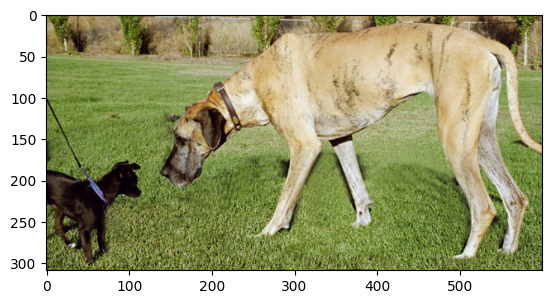

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


sample_img = Image.open("sample.png")
plt.imshow(sample_img)

In [ ]:
sample_input = transforms(sample_img).unsqueeze(0) # Unsqueeze 함수를 통해 batch 차원을 임의로 생성함.
sample_output = model(sample_input)
# 임의로 생성된 sample input을 vit에 넣고 sample output을 얻음.
# -> batch size(1,1000): 두번 째 차원이 1000인 이유는 imagenet을 통해 학습
sample_output.shape

torch.Size([1, 1000])

In [ ]:
# wget을 통해 imagenet class의 이름을 불러오고, sample output에 argmax를 통하여 vit가 가장 높은 확률로 인식한 class의 index의 이름을 확인
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))
imagenet_labels[int(torch.argmax(sample_output))]

--2023-12-04 07:34:24--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c06::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0s      

2023-12-04 07:34:25 (113 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt’ saved [21675/21675]



'Great_Dane\n'

In [ ]:
# vit는 어떻게 예측을 하였는가?
# patch_embed를 통하여 입력 이미지를 patch로 변환하고 shape 확인.
# -> model 224x224 입력된 반면, 생성된 patch는 384 크기의 patch
patches = model.patch_embed(sample_input)
print(sample_input.shape)
print(patches.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 196, 384])


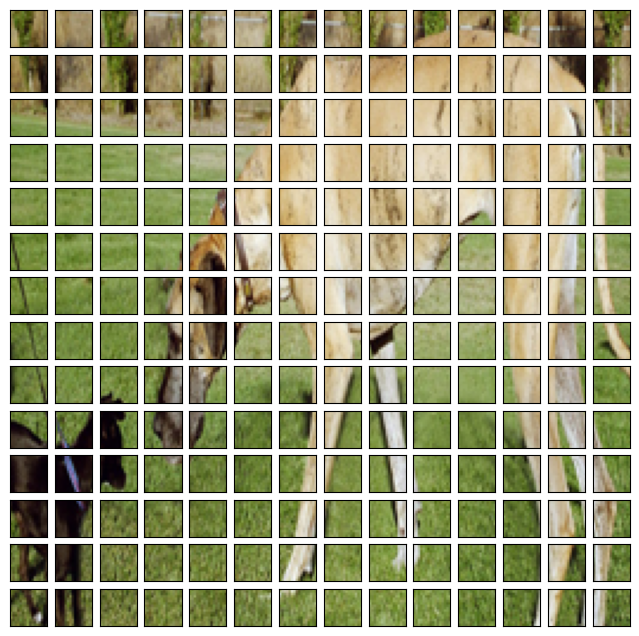

In [ ]:
# patch 분할 방식은?
# 큰 이미지를 16x16으로 각각 patch를 생성. 본 이미지의 크기가 224x224이기 때문에, 가로 세로로 각 14개의 patch가 생성.
# 이러한 patch들이 vit model로 입력됨.
import numpy as np

fig = plt.figure(figsize=(8, 8))
img = np.asarray(sample_img.resize((224, 244)))
for i in range(0, 14*14):
    x = i % 14
    y = i // 14
    patch = img[y*16:(y+1)*16, x*16:(x+1)*16]
    ax = fig.add_subplot(14, 14, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch)

In [ ]:
# Positional embeding?
# 1x197x384: 196개의 patch에 대해서 각각 positional embeding이 붙는데, class token에도 붙음(196+1).
pos_embed = model.pos_embed
pos_embed.shape

torch.Size([1, 197, 384])

In [ ]:
# attention layer?
# qkv라는 SC layer를 가지고 있음.
attention = model.blocks[0].attn
attention

Attention(
  (qkv): Linear(in_features=384, out_features=1152, bias=True)
  (q_norm): Identity()
  (k_norm): Identity()
  (attn_drop): Dropout(p=0.0, inplace=False)
  (proj): Linear(in_features=384, out_features=384, bias=True)
  (proj_drop): Dropout(p=0.0, inplace=False)
)

In [ ]:
# attention block에 들어갈 input을 만듦.
# cls token과 patch들을 concatinate를 이용하여 붙여줌.
# 이 값에 postional embeding을 더해줌. -> transformer 입력에 해당하는 크기의 입력이 완성됨.
# 이를 attention block에 있는 qkv layer에 입력하면 transformer input에 해당하는 행렬이 생성.

# qkv: 입력에 대해서 각각의 query, key, value를 생성하는 fc layer
transformer_input = torch.cat((model.cls_token, patches), dim=1) + pos_embed
transformer_input.shape

torch.Size([1, 197, 384])

In [ ]:
transformer_input_expanded = attention.qkv(transformer_input)[0]
print(transformer_input_expanded.shape) # 하나의 fc layer를 통하여 qkv 전부를 이어붙인 vector 생성 -> 이를 3개로 쪼갬.

torch.Size([197, 1152])


In [ ]:
qkv = transformer_input_expanded.reshape(197, 3, 12, 32)  # (N=197, (qkv), H=12, D/H=32)
qkv.shape

torch.Size([197, 3, 12, 32])

In [ ]:
q = qkv[:, 0].permute(1, 0, 2)  # (H=12, N=197, D/H=32)
k = qkv[:, 1].permute(1, 0, 2)  # (H=12, N=197, D/H=32)
kT = k.permute(0, 2, 1)  # (H=12, D/H=32, N=197)

In [ ]:
attention_matrix = q @ kT # kT를 dot product함으로써 multi head(12)x197x197의 tensor를 가지는 attention_matrix를 얻음
attention_matrix.shape

torch.Size([12, 197, 197])

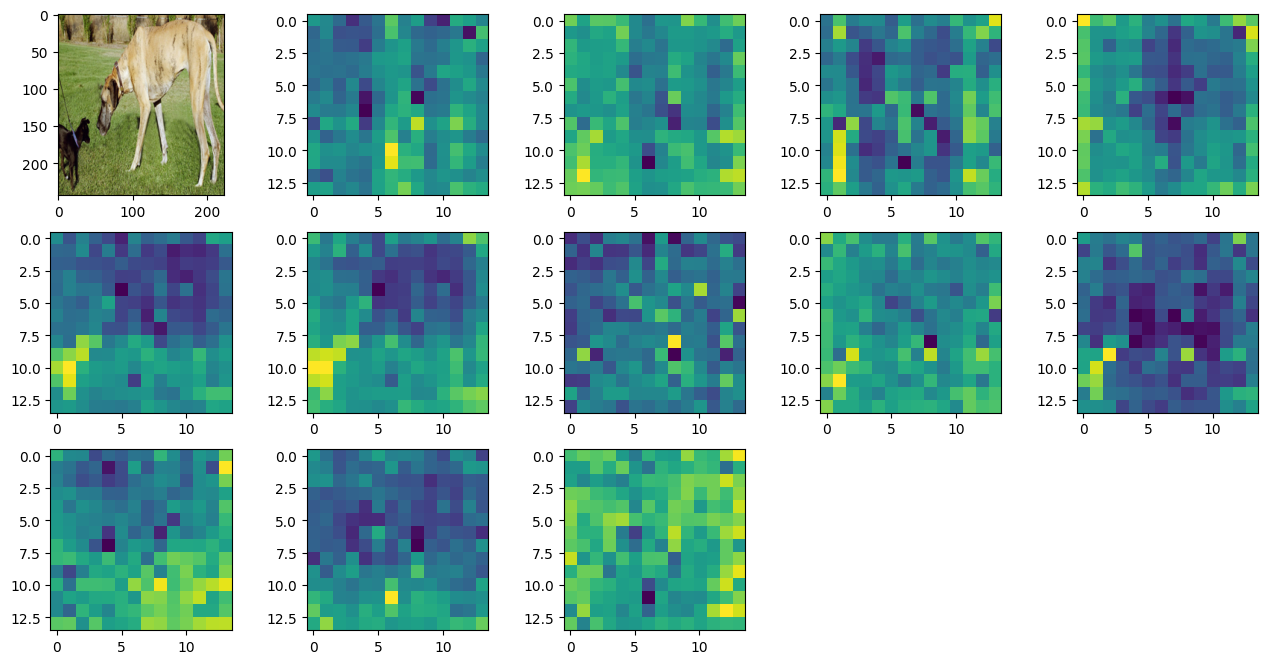

In [ ]:
# attention을 각 head에 대해서 시각화
# 2번 째 차원에서는 patch에 해당하는 첫 번째 index부터 시각화.
# -> 하나의 이미지가 하나의 attention score에 해당하는 heatmap. -> 강아지에 대해 attention(어떤 것에 집중하는지 확인 가능.)

#  fine tunning!

fig = plt.figure(figsize=(16, 8))
img = np.asarray(img)
ax = fig.add_subplot(3, 5, 1)
ax.imshow(img)
for head in range(len(attention_matrix)):
    attn_heatmap = attention_matrix[head, 1:, 0].reshape((14, 14)).detach().numpy()
    ax = fig.add_subplot(3, 5, head+2)
    ax.imshow(attn_heatmap)

In [ ]:
from torchvision.datasets import CIFAR10
trn_dataset = CIFAR10(".", train=True, download=True, transform=transforms)
test_dataset = CIFAR10(".", train=False, download=True, transform=transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 44126422.22it/s]


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
batch_size = 128
trn_loader = torch.utils.data.DataLoader(trn_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.nn as nn
import torch.optim as optim

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm import tqdm

def train(model, criterion, optimizer, trn_loader, test_loader, num_epochs):
  for epoch in range(num_epochs):

    model.train()
    trn_loss = 0.0
    trn_corrects = 0
    for inputs, labels in tqdm(trn_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      trn_loss += loss.item() * inputs.size(0)
      trn_corrects += torch.sum(preds == labels.data)

    trn_epoch_loss = trn_loss / len(trn_loader.dataset)
    trn_epoch_acc = trn_corrects.double() / len(trn_loader.dataset)
    print(f"[Train] Loss: {trn_epoch_loss:.4f} Acc: {trn_epoch_acc:.4f}:")

    with torch.no_grad():
      model.eval()
      test_loss = 0.0
      test_corrects = 0
      for inputs, labels in tqdm(test_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        test_corrects += torch.sum(preds == labels.data)

      test_epoch_loss = test_loss / len(test_loader.dataset)
      test_epoch_acc = test_corrects.double() / len(test_loader.dataset)
      print(f"[Test] Loss: {test_epoch_loss:.4f} Acc: {test_epoch_acc:.4f}:")

In [ ]:
train(model, criterion, optimizer, trn_loader, test_loader, num_epochs=10)

100%|██████████| 391/391 [08:31<00:00,  1.31s/it]


[Train] Loss: 1.7604 Acc: 0.3650:


100%|██████████| 79/79 [00:43<00:00,  1.81it/s]


[Test] Loss: 1.2308 Acc: 0.5483:


100%|██████████| 391/391 [08:28<00:00,  1.30s/it]


[Train] Loss: 1.0247 Acc: 0.6327:


100%|██████████| 79/79 [00:42<00:00,  1.85it/s]


[Test] Loss: 0.9717 Acc: 0.6608:


100%|██████████| 391/391 [08:29<00:00,  1.30s/it]


[Train] Loss: 0.7951 Acc: 0.7187:


100%|██████████| 79/79 [00:41<00:00,  1.89it/s]


[Test] Loss: 0.8132 Acc: 0.7208:


100%|██████████| 391/391 [08:29<00:00,  1.30s/it]


[Train] Loss: 0.6792 Acc: 0.7612:


100%|██████████| 79/79 [00:41<00:00,  1.92it/s]


[Test] Loss: 0.6694 Acc: 0.7673:


100%|██████████| 391/391 [08:29<00:00,  1.30s/it]


[Train] Loss: 0.5894 Acc: 0.7934:


100%|██████████| 79/79 [00:43<00:00,  1.81it/s]


[Test] Loss: 0.6579 Acc: 0.7658:


100%|██████████| 391/391 [08:28<00:00,  1.30s/it]


[Train] Loss: 0.5169 Acc: 0.8172:


100%|██████████| 79/79 [00:41<00:00,  1.90it/s]


[Test] Loss: 0.5958 Acc: 0.7973:


100%|██████████| 391/391 [08:29<00:00,  1.30s/it]


[Train] Loss: 0.4657 Acc: 0.8369:


100%|██████████| 79/79 [00:41<00:00,  1.90it/s]


[Test] Loss: 0.5806 Acc: 0.7968:


100%|██████████| 391/391 [08:29<00:00,  1.30s/it]


[Train] Loss: 0.4133 Acc: 0.8543:


100%|██████████| 79/79 [00:42<00:00,  1.87it/s]


[Test] Loss: 0.5852 Acc: 0.7997:


100%|██████████| 391/391 [08:28<00:00,  1.30s/it]


[Train] Loss: 0.3749 Acc: 0.8663:


100%|██████████| 79/79 [00:41<00:00,  1.89it/s]


[Test] Loss: 0.5704 Acc: 0.8113:


100%|██████████| 391/391 [08:29<00:00,  1.30s/it]


[Train] Loss: 0.3274 Acc: 0.8836:


100%|██████████| 79/79 [00:41<00:00,  1.90it/s]

[Test] Loss: 0.6015 Acc: 0.8083:
